# 1. Cargando Datos

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Definir un dataframe para llamar el dataset
df = pd.read_csv("./data/disney_movies.csv")

In [3]:
#Ejecutar
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


# 2. Explorando Datos

In [4]:
# ¿Qué columnas tienen los datos?
df.columns

Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross'],
      dtype='object')

In [5]:
# ¿Qué tamaño tienen los datos?
df.shape

(579, 6)

In [6]:
# ¿Existen valores nulos en los datos?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [7]:
# ¿Cómo se distribuyen las variables numéricas?
df.describe()

,total_gross,inflation_adjusted_gross
count,5.790000e+02,5.790000e+02
mean,6.470179e+07,1.187625e+08
std,9.301301e+07,2.860853e+08
min,0.000000e+00,0.000000e+00
25%,1.278886e+07,2.274123e+07
50%,3.070245e+07,5.515978e+07
75%,7.570903e+07,1.192020e+08
max,9.366622e+08,5.228953e+09


In [8]:
# ¿Cómo se comportan las variables categóricas?
df.describe(include=['O'])

,movie_title,release_date,genre,mpaa_rating
count,579,579,562,523
unique,573,553,12,5
top,The Jungle Book,1997-12-25,Comedy,PG
freq,3,3,182,187


# 3. Limpiando los Datos

In [9]:
# Eliminar filas duplicadas
df.drop_duplicates()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [10]:
# Comprobando la película repetida
title = df[ df["movie_title"] == "The Jungle Book"]
title

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
194,The Jungle Book,1994-12-25,Adventure,PG,44342956,88930321
567,The Jungle Book,2016-04-15,Adventure,PG,364001123,364001123


In [11]:
# Visualizando las 10 primeras filas de datos
df.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574


In [12]:
# Aplicando el método de copiar el dato de la fila siguiente para rellenar nulos
df.mpaa_rating = df.mpaa_rating.fillna(method='bfill')
df.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,G,28200000,528279994
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
7,Sleeping Beauty,1959-01-29,Drama,G,9464608,21505832
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,1961-03-16,Comedy,G,25381407,310094574


In [13]:
df.genre.describe()

count        562
unique        12
top       Comedy
freq         182
Name: genre, dtype: object

In [14]:
# Eliminando filas con datos nulos para género de película
df = df.dropna()

In [15]:
# Visualizando datos con ceros en la taquilla
df[ df["total_gross"] == 0]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
27,Amy,1981-03-20,Drama,PG,0,0
29,Condorman,1981-08-07,Action,PG,0,0


In [16]:
# Visualizando datos con ceros en la inflación ajustada
df[ df["inflation_adjusted_gross"] == 0]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
27,Amy,1981-03-20,Drama,PG,0,0
29,Condorman,1981-08-07,Action,PG,0,0


In [17]:
# Eliminando las filas con ceros
df.drop(27, inplace=True)
df.drop(29, inplace=True)
df[19:22]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
19,Freaky Friday,1977-01-21,Comedy,PG,25942000,98067733
21,The Rescuers,1977-06-22,Adventure,PG,48775599,159743914
28,The Fox and the Hound,1981-07-10,Comedy,PG,43899231,133118889


In [18]:
df.describe()/1000000

,total_gross,inflation_adjusted_gross
count,0.000560,0.000560
mean,66.686230,122.135531
std,93.925641,290.239482
min,0.002815,0.002984
25%,14.607412,24.866869
50%,32.349264,57.070147
75%,78.561112,123.525630
max,936.662225,5228.953251


In [19]:
df.isnull().sum()

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

# 4.Organizar Datos

In [20]:
# Colocar la columna de fecha como índice
df.set_index("release_date").sort_values(by="release_date")

,movie_title,genre,mpaa_rating,total_gross,inflation_adjusted_gross
release_date,,,,,
1937-12-21,Snow White and the Seven Dwarfs,Musical,G,184925485,5228953251
1940-02-09,Pinocchio,Adventure,G,84300000,2188229052
1940-11-13,Fantasia,Musical,G,83320000,2187090808
1946-11-12,Song of the South,Adventure,G,65000000,1078510579
1950-02-15,Cinderella,Drama,G,85000000,920608730
...,...,...,...,...,...
2016-09-02,The Light Between Oceans,Drama,PG-13,12545979,12545979
2016-09-23,Queen of Katwe,Drama,PG,8874389,8874389
2016-11-04,Doctor Strange,Adventure,PG-13,232532923,232532923


# 5. Estadísticas y Gráficos

#### 5.1. ¿Cúal es la película más taquillera en cuanto a taquilla bruta?

In [21]:
df[["total_gross"]].max()

total_gross    936662225
dtype: int64

In [22]:
df[df.total_gross == df.total_gross.max()]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225


In [23]:
MovieMaxGross = df[df.total_gross == df.total_gross.max()]
MovieMaxGross.movie_title

564    Star Wars Ep. VII: The Force Awakens
Name: movie_title, dtype: object

In [24]:
df[["total_gross"]].min()

total_gross    2815
dtype: int64

In [25]:
df[ df["total_gross"] == df.total_gross.min()]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
511,Zokkomon,2011-04-22,Adventure,PG,2815,2984


In [26]:
MovieMinGross = df[df.total_gross == df.total_gross.min()]
MovieMinGross.movie_title

511    Zokkomon
Name: movie_title, dtype: object

<AxesSubplot:xlabel='movie_title'>

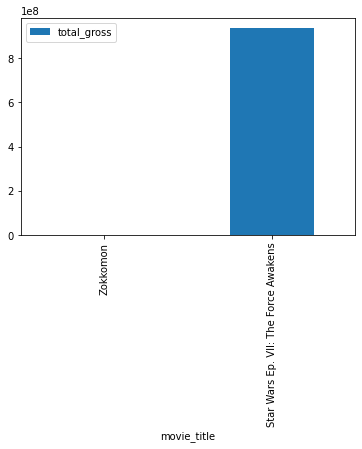

In [27]:
# Gráfica taquilla máxima vs taquilla mínima 
df[492:547:53].plot.bar(x='movie_title', y='total_gross', rot=90)

Conclusión: tanto la película más taquillera como la menos taquillera son recientes, ambas pertenecen al género de aventura y se encuentran entre las categorías de acceso a público menor de edad


#### 2.¿Cúal es la película más taquillera en cuanto a la inflación ajustada?

In [28]:
df[["inflation_adjusted_gross"]].max()

inflation_adjusted_gross    5228953251
dtype: int64

In [29]:
df[ df["inflation_adjusted_gross"] == df.inflation_adjusted_gross.max()]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251


In [30]:
MovieMaxIAG = df[df.inflation_adjusted_gross == df.inflation_adjusted_gross.max()]
MovieMaxIAG.movie_title

0    Snow White and the Seven Dwarfs
Name: movie_title, dtype: object

In [31]:
df[["inflation_adjusted_gross"]].min()

inflation_adjusted_gross    2984
dtype: int64

In [32]:
df[ df["inflation_adjusted_gross"] == df.inflation_adjusted_gross.min()]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
511,Zokkomon,2011-04-22,Adventure,PG,2815,2984


In [33]:
MovieMinIAG = df[df.inflation_adjusted_gross == df.inflation_adjusted_gross.min()]
MovieMinIAG.movie_title

511    Zokkomon
Name: movie_title, dtype: object

Conclusión: La película con mayor inflación ajustada difieren en 74 años con la de menor inflación ajustada, pertenecen a géneros distintos y ambas se encuentran entre las categorías de acceso a público menor de edad

#### 3.¿Qué relación existe entre la película la mayor taquilla bruta y la mayor inflación ajustada?

In [34]:
MovieMaxIAG

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251


In [35]:
MovieMaxGross

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225


<AxesSubplot:xlabel='movie_title'>

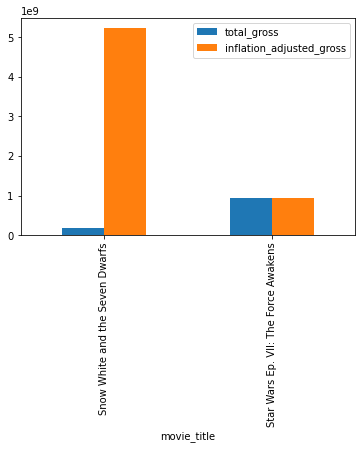

In [36]:
# Gráfica taquila máxima bruta vs taquilla máxima ajustada 751millones 736 740    4.29 229 103 4mill millones

df[0:547:545].set_index("movie_title").plot.bar(rot=90)

Conclusión: Hay un margen aproximado de 700 millones entre la taquilla bruta de ambas películas y un aproximado de 4 mil millones en la inflación ajustada. Por lo que el ajuste en la inflación para Blanca nieves pasó de un 184925485 

#### 4.¿Qué relación existe entre el género y las categorías mpa?

In [37]:
grouped_rating = df.groupby(['genre','mpaa_rating']).count()['movie_title']
grouped_rating

genre                mpaa_rating
Action               PG              8
                     PG-13          19
                     R              12
Adventure            G              43
                     Not Rated       1
                     PG             58
                     PG-13          17
                     R              10
Black Comedy         R               3
Comedy               G              19
                     Not Rated       1
                     PG             87
                     PG-13          38
                     R              37
Concert/Performance  G               2
Documentary          G              10
                     Not Rated       1
                     PG              5
Drama                G               6
                     PG             34
                     PG-13          37
                     R              36
Horror               PG              1
                     PG-13           1
                     R         

<AxesSubplot:xlabel='genre'>

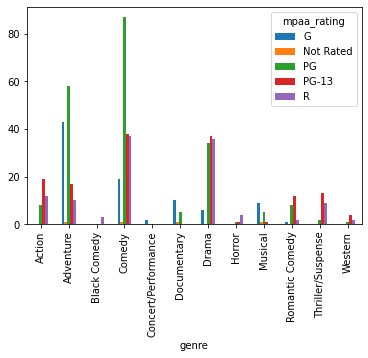

In [38]:
(grouped_rating.unstack(level=1).plot.bar())

<AxesSubplot:xlabel='mpaa_rating'>

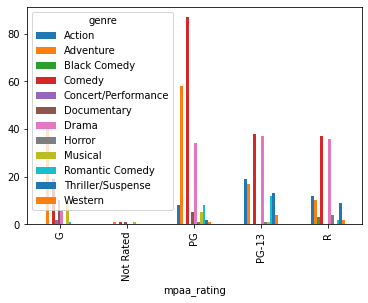

In [39]:
(grouped_rating.unstack(level=0).plot.bar())

Conclusión: Las categorías más utilizadas son G, PG y PG-13. Mientras que los géneros más producidos son los de comedia, aventura y drama.

#### 5.¿Cuál es el top 5 de comedias con mayor taquilla incluyendo la inflación ajustada?

In [40]:
comedy = df[ df["genre"] == "Comedy"]
comedy

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
9,The Absent Minded Professor,1961-03-16,Comedy,G,25381407,310094574
11,Bon Voyage!,1962-05-17,Comedy,Not Rated,9230769,109581646
14,Blackbeard's Ghost,1968-02-08,Comedy,G,21540050,138612686
16,The Boatniks,1970-07-01,Comedy,PG,18607492,101200742
...,...,...,...,...,...,...
528,Frankenweenie,2012-10-05,Comedy,PG,35287788,37363513
535,Disney Planes,2013-08-09,Comedy,PG,90282580,93614037
540,Delivery Man,2013-11-22,Comedy,PG-13,30659817,31787136
543,Muppets Most Wanted,2014-03-21,Comedy,PG,51178893,52807594


In [41]:
comedy.nlargest(5,'inflation_adjusted_gross')

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
135,Aladdin,1992-11-11,Comedy,G,217350219,441969178
60,3 Men and a Baby,1987-11-25,Comedy,PG,167780960,353334607
66,Who Framed Roger Rabbit?,1988-06-22,Comedy,PG,154112492,316250084
440,Cars,2006-06-09,Comedy,G,244082982,314140384


<AxesSubplot:xlabel='movie_title'>

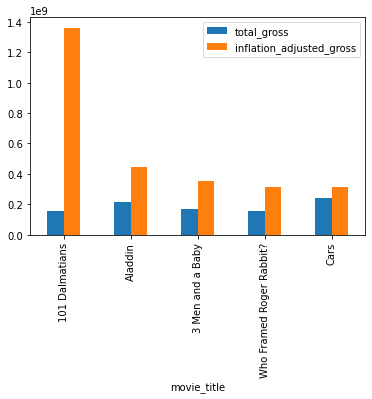

In [42]:
comedy.nlargest(5,'inflation_adjusted_gross').set_index("movie_title").plot.bar()

Conclusión: Apesar de contar con la taquilla bruta más elevada Cars en el ajuste de inflación se queda por debajo de películas más atiguas.